In [1]:
from utils import config_gpu
_ = config_gpu()

/home/youjin2/venvs/py3/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## dropout layer
- 0.2~0.5
- valid for training phase (use all units in test phase)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
model = Sequential()

In [5]:
model.add(Dense(64, activation='relu', input_dim=20))

In [6]:
model.add(Dropout(0.5))

In [7]:
model.add(Dense(64, activation='relu'))

In [8]:
model.add(Dropout(0.5))

In [9]:
model.add(Dense(10, activation='softmax'))

In [10]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']
)

## batch-normalization layer
- normalize current output passed to next layers
    - e.g.
        - divide by 255 to keep pixel value b.w. 0-1
- normalizing not only input layers but also middle layers could improve network accuracy
- advantage
    - stablize learning rate
    - less training times

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization

In [12]:
model = Sequential()

In [13]:
model.add(Dense(64, input_dim=20))

In [14]:
model.add(BatchNormalization())

In [15]:
model.add(Activation('relu'))

In [16]:
model.add(Dense(64))

In [17]:
model.add(BatchNormalization())

In [18]:
model.add(Activation('relu'))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']
)

## lambda layer
- can add arbitrary equations or functions as keras layer object
    - e.g.
        - normalize by divide 255

In [21]:
from tensorflow.keras.layers import Input, Lambda
from tensorflow.keras.models import Model

In [22]:
model_in = Input(shape=(20, ))

In [25]:
x = Lambda(lambda x: x/255.)(model_in)

In [26]:
x = Dense(64, activation='relu')(x)

In [27]:
model_out = Dense(10, activation='softmax')(x)

In [28]:
model = Model(
    inputs=model_in,
    outputs=model_out
)

In [29]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='SGD',
    metrics=['accuracy']
)

## activation function
- ReLU
- LeakyReLU
- ELU
- Clipped ReLU

In [36]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dense(1, activation='sigmoid'))
model.compile(
    loss='binary_crossentropy',
    optimizer='SGD',
    metric=['accuracy']
)

In [31]:
from tensorflow.keras.layers import Activation
from tensorflow.keras.activations import relu

In [32]:
model = Sequential()

In [33]:
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [34]:
model.compile(
    loss='binary_crossentropy',
    optimizer='SGD',
    mertics=['accuracy']
)

* clipped relu example

In [37]:
model = Sequential()

In [38]:
model.add(
    Dense(
        64,
        input_dim=20,
        activation=lambda x: relu(x, max_value=2)
    )
)

In [39]:
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile(
    loss='binary_crossentropy',
    optimizer='SGD',
    mertics=['accuracy']
)

## image data generator
- preprocessing
- mini-batch
- options
    - rescale: scale transform
    - rotation_range: rotate image (0-180 degree)
    - width_shift_range
    - height_shift_range
    - shear_range: counter clockwise (degree)
    - zoom_range
    - horizontal_flip: flip along the horizontal axis
    - vertical_flip: flip along the vertical axis

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
gen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=90,
    width_shift_range=1.,
    height_shift_range=.5,
    shear_range=.8,
    zoom_range=.5,
    horizontal_flip=True,
    vertical_flip=True
)

In [64]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
img = cv.imread('../data/chap7/img/samples/car.jpg')

In [69]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

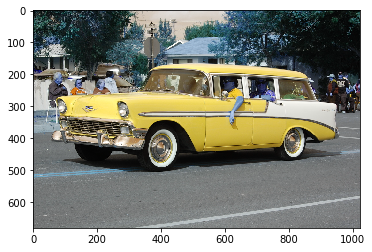

In [74]:
plt.imshow(img)

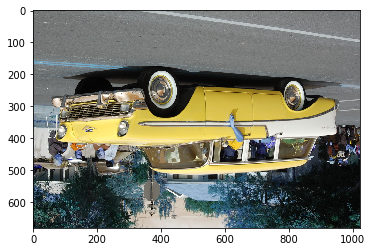

In [76]:
plt.imshow(gen.apply_transform(img, transform_parameters={'flip_vertical': True}))

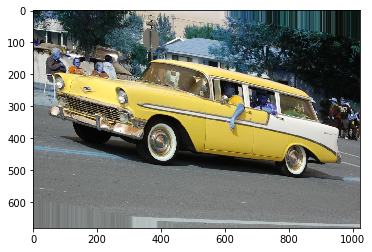

In [80]:
plt.imshow(gen.apply_transform(img, transform_parameters={'shear': 10}))

In [81]:
iters = gen.flow_from_directory(
    '../data/chap7/img/',
    target_size=(32, 32),
    class_mode='binary',
    batch_size=5,
    shuffle=True
)

Found 25 images belonging to 2 classes.


In [82]:
x_train_batch, y_train_batch = next(iters)

In [93]:
x_train_batch.shape, y_train_batch.shape

((5, 32, 32, 3), (5,))

## training with iterator

In [94]:
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D

In [95]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [97]:
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop'
)

In [98]:
steps_per_epoch = math.ceil(iters.samples/5)

In [100]:
steps_per_epoch

5

In [101]:
history = model.fit_generator(
    iters,
    steps_per_epoch=steps_per_epoch
)

5/5 [==============================] - 1s 182ms/step - loss: 2.6705
